In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("201706-202006_양파가격.csv")
df=df.drop("Unnamed: 0", axis=1)
df.head()

,날짜,품목,품질,거래단위,최저가,최고가,평균가,전일평균대비등락,전7일평균대비등락,전년동월동일평균대비등락
0,2017-06-10,양파,특,1kg,1197,1500,1219,-146,"1,365(89.0%)","1,222(99.0%)"
1,2017-06-10,양파,상,1kg,1083,1197,1138,-40,"1,178(96.0%)","1,111(102.0%)"
2,2017-06-10,양파,보통,1kg,845,1083,968,-65,"1,033(93.0%)",947(102.0%)
3,2017-06-10,양파,하,1kg,300,845,681,-20,701(97.0%),556(122.0%)
4,2017-06-10,양파,특,20kg,23300,23700,23449,-710,"24,159(97.0%)","23,351(100.0%)"


In [4]:
df["날짜"] = df.날짜.apply(lambda x : pd.to_datetime(x))
df["연도"]=df.날짜.dt.year
df["품목_종합"] = df["품목"] + "_" + df["품질"] + "_" + df["거래단위"]
df["월일"]=df["날짜"].apply(lambda x : pd.to_datetime(x).strftime('%m-%d'))
df=df[df.품목 != "양파 자주색"]

In [65]:
df_list = []
for i in list(df.품목_종합.unique()):
        df_list.append(df[df["품목_종합"] == i].sort_values("월일"))

In [ ]:
plt.style.use("ggplot")
plt.rcParams['font.family'] = "NanumGothic" 
fig = plt.figure(figsize=[40,40])
for j in range(1,21):
    plt.subplot(10,2,j)
    plt.title(df_list[j-1].품목_종합.iloc[0])
    plt.xticks(rotation=90)
    sns.scatterplot(x=df_list[j-1].월일, y=df_list[j-1].평균가, hue=df_list[j-1].연도)

In [154]:
fig.savefig("양파가격추세.pdf")

In [92]:
df["수확기"]=(df.날짜.dt.month>=4) & (df.날짜.dt.month<=7)

In [101]:
onion_price_var=pd.DataFrame(df.groupby(["연도", "수확기", "품목_종합"])["평균가"].var()).reset_index()

In [102]:
onion_price_mean=pd.DataFrame(df.groupby(["연도", "수확기", "품목_종합"])["평균가"].mean()).reset_index()

In [107]:
onion_price_var[onion_price_var.연도 == 2017]

,연도,수확기,품목_종합,평균가
0,2017,False,양파 수입_보통_1kg,4.633007e+03
1,2017,False,양파 수입_상_1kg,3.239903e+03
2,2017,False,양파 수입_특_1kg,1.404500e+03
3,2017,False,양파 수입_하_1kg,1.423159e+04
4,2017,False,양파_보통_12kg,9.732808e+04
5,2017,False,양파_보통_1kg,5.034687e+03
6,2017,False,양파_보통_20kg,3.464220e+06
7,2017,False,양파_상_12kg,6.771055e+05
8,2017,False,양파_상_1kg,2.683312e+03
9,2017,False,양파_상_20kg,1.533600e+06


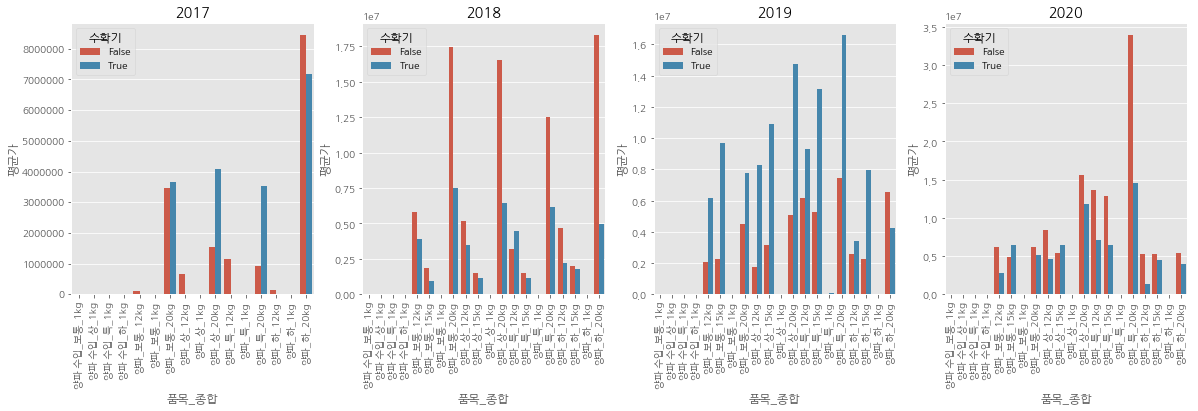

In [136]:
fig2 = plt.figure(figsize=[20,5])
plt.subplot(1,4,1)
plt.xticks(rotation=90)
plt.title("2017")
sns.barplot(data=onion_price_var[onion_price_var.연도 == 2017],
           x="품목_종합",
           y="평균가",
           hue="수확기")
plt.subplot(1,4,2)
plt.xticks(rotation=90)
plt.title("2018")
sns.barplot(data=onion_price_var[onion_price_var.연도 == 2018],
           x="품목_종합",
           y="평균가",
           hue="수확기")
plt.subplot(1,4,3)
plt.xticks(rotation=90)
plt.title("2019")
sns.barplot(data=onion_price_var[onion_price_var.연도 == 2019],
           x="품목_종합",
           y="평균가",
           hue="수확기")
plt.subplot(1,4,4)
plt.xticks(rotation=90)
plt.title("2020")
sns.barplot(data=onion_price_var[onion_price_var.연도 == 2020],
           x="품목_종합",
           y="평균가",
           hue="수확기")

In [138]:
fig2.savefig("분산비교.png")